In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data = pd.read_csv("train.csv")
data.info()
copy_data = data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

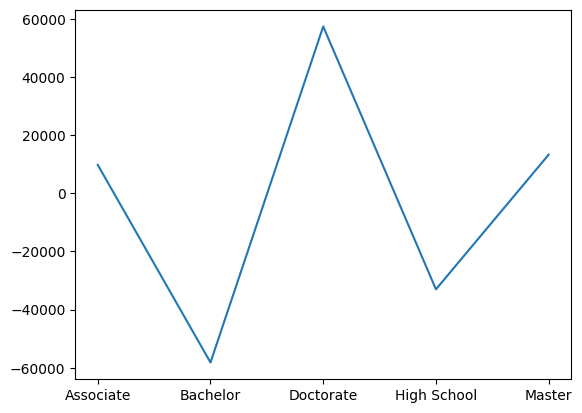

In [3]:
d = data.groupby('EducationLevel')['RiskScore'].agg('mean')
plt.plot(d.index, d)


In [4]:
def encode(data):
    encode_data = data.copy()
    columns = encode_data.select_dtypes(include=['object', 'category']).columns.to_list()
    encode_data = pd.get_dummies(encode_data, columns=columns, prefix=columns)
    return encode_data


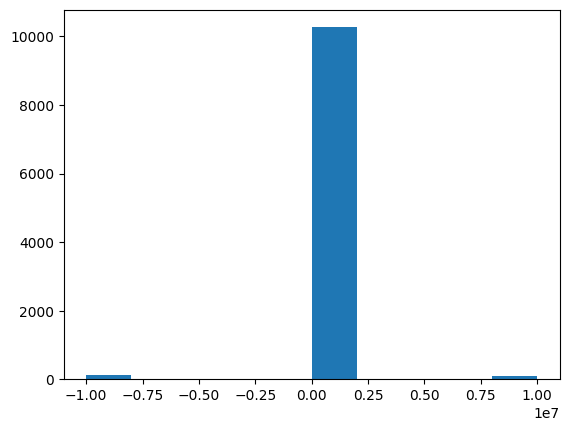

In [5]:
plt.hist(data['RiskScore'])
plt.show()

In [6]:
data = data.dropna()
# print(data['RiskScore'])
data = data[np.abs(data['RiskScore']) <= 100].copy()

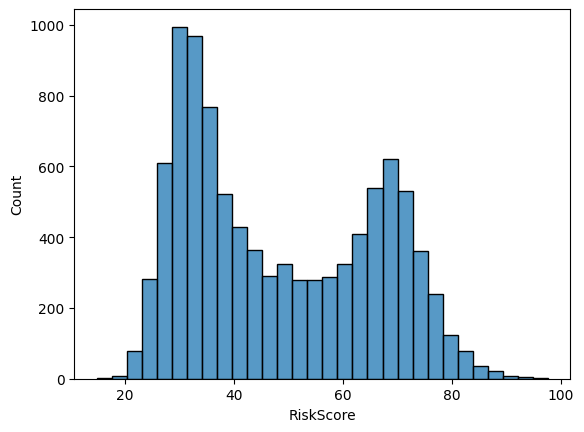

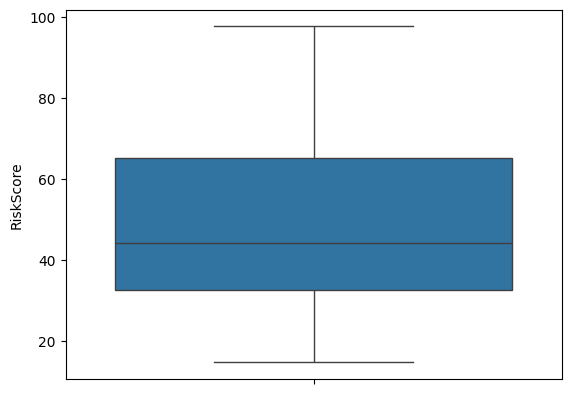

In [7]:
sns.histplot(data['RiskScore'], bins=30)
plt.show()
sns.boxplot(data['RiskScore'])
plt.show()

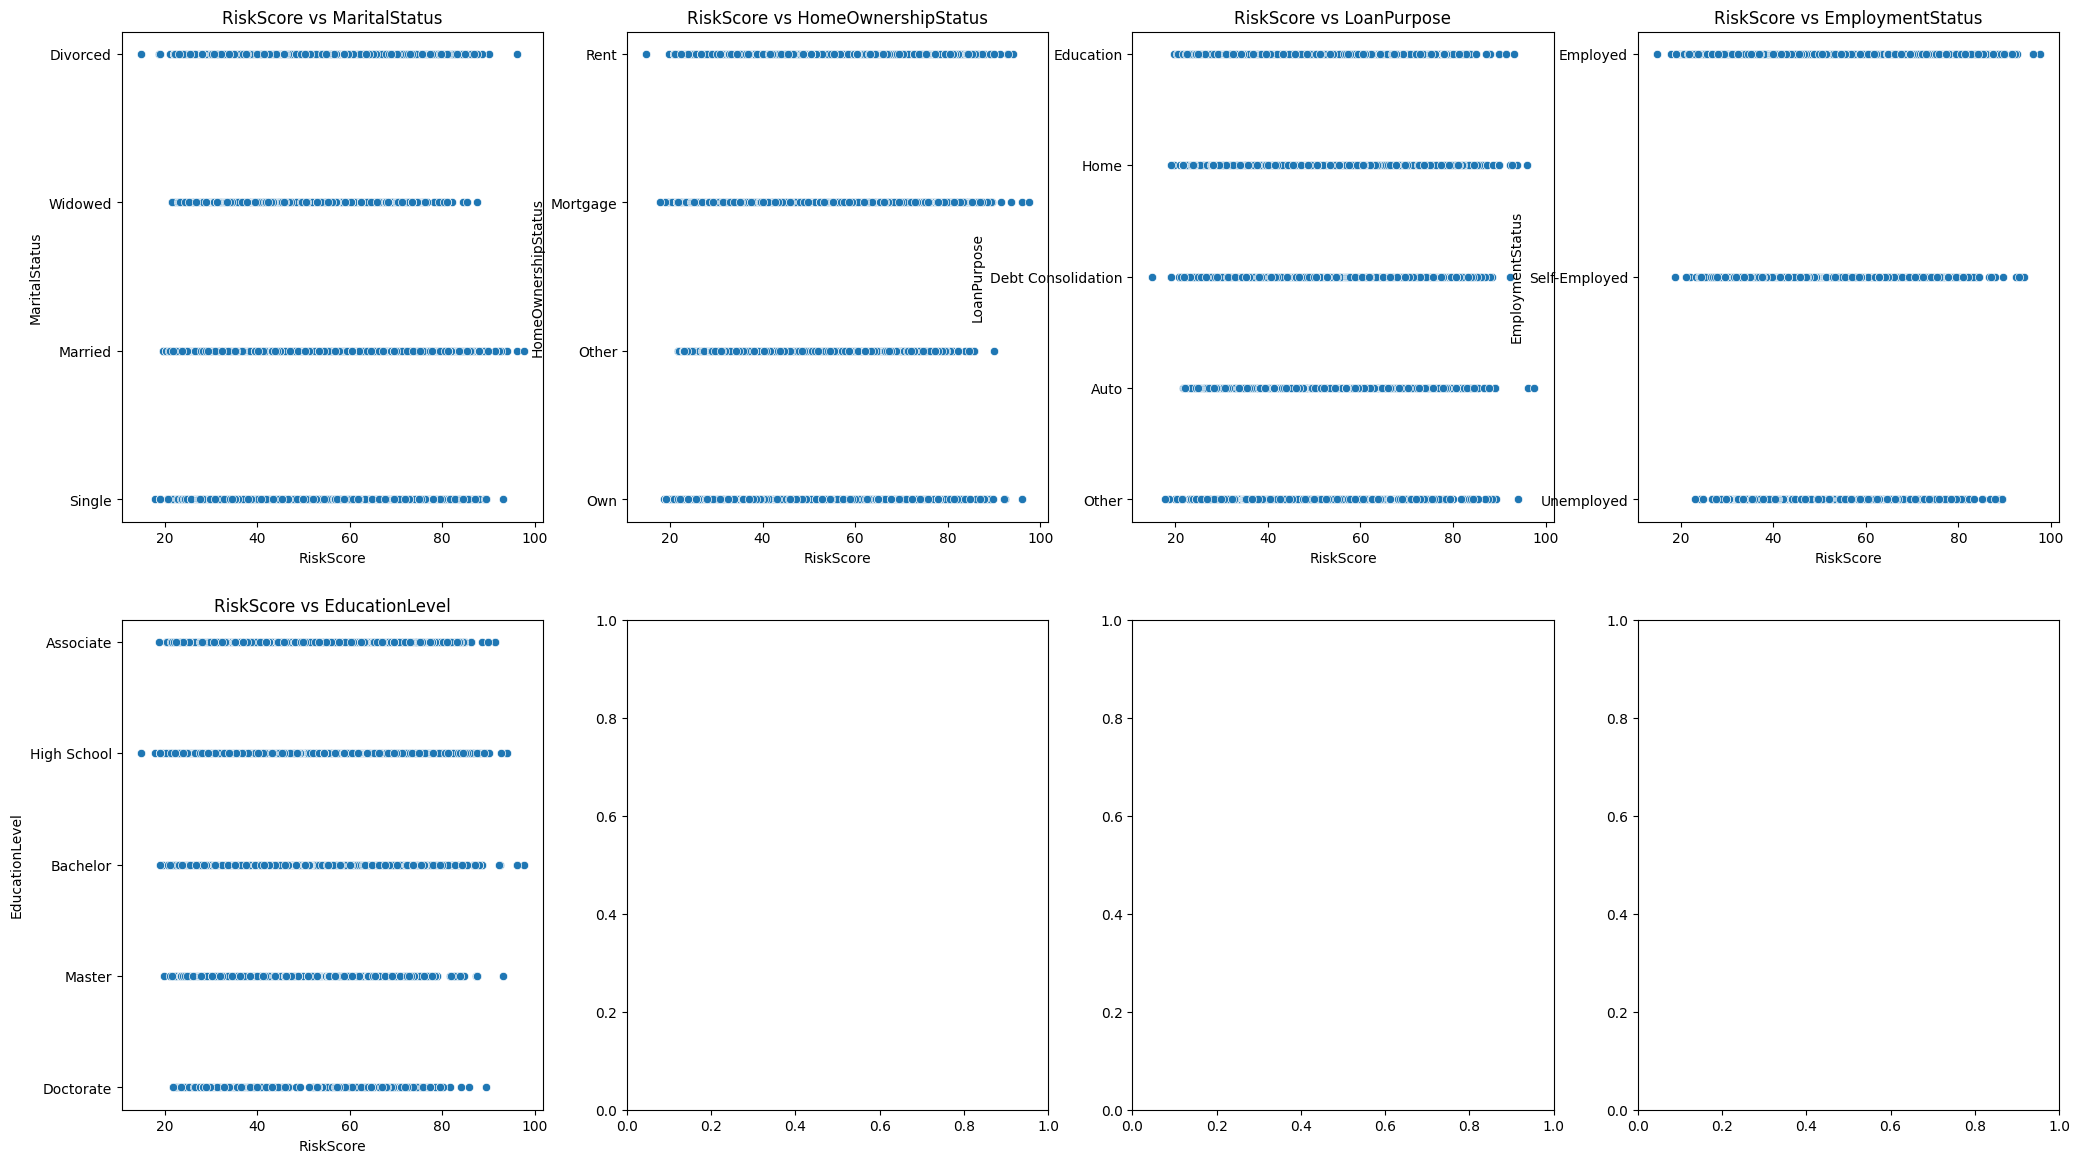

In [8]:
columns_with_number = data.select_dtypes(include=['object']).columns.to_list()
columns_with_number.remove('ApplicationDate')
number_column_gr = 4
number_rows_gr = math.ceil(len(columns_with_number) / number_column_gr)
fig, axes = plt.subplots(number_rows_gr, number_column_gr, figsize=(25, 7 * number_rows_gr))
axes = axes.flatten()
for i, column in enumerate(columns_with_number):
    sns.scatterplot(data=data, x='RiskScore', y=column, ax=axes[i])
    axes[i].set_title(f'RiskScore vs {column}')

plt.show()
    


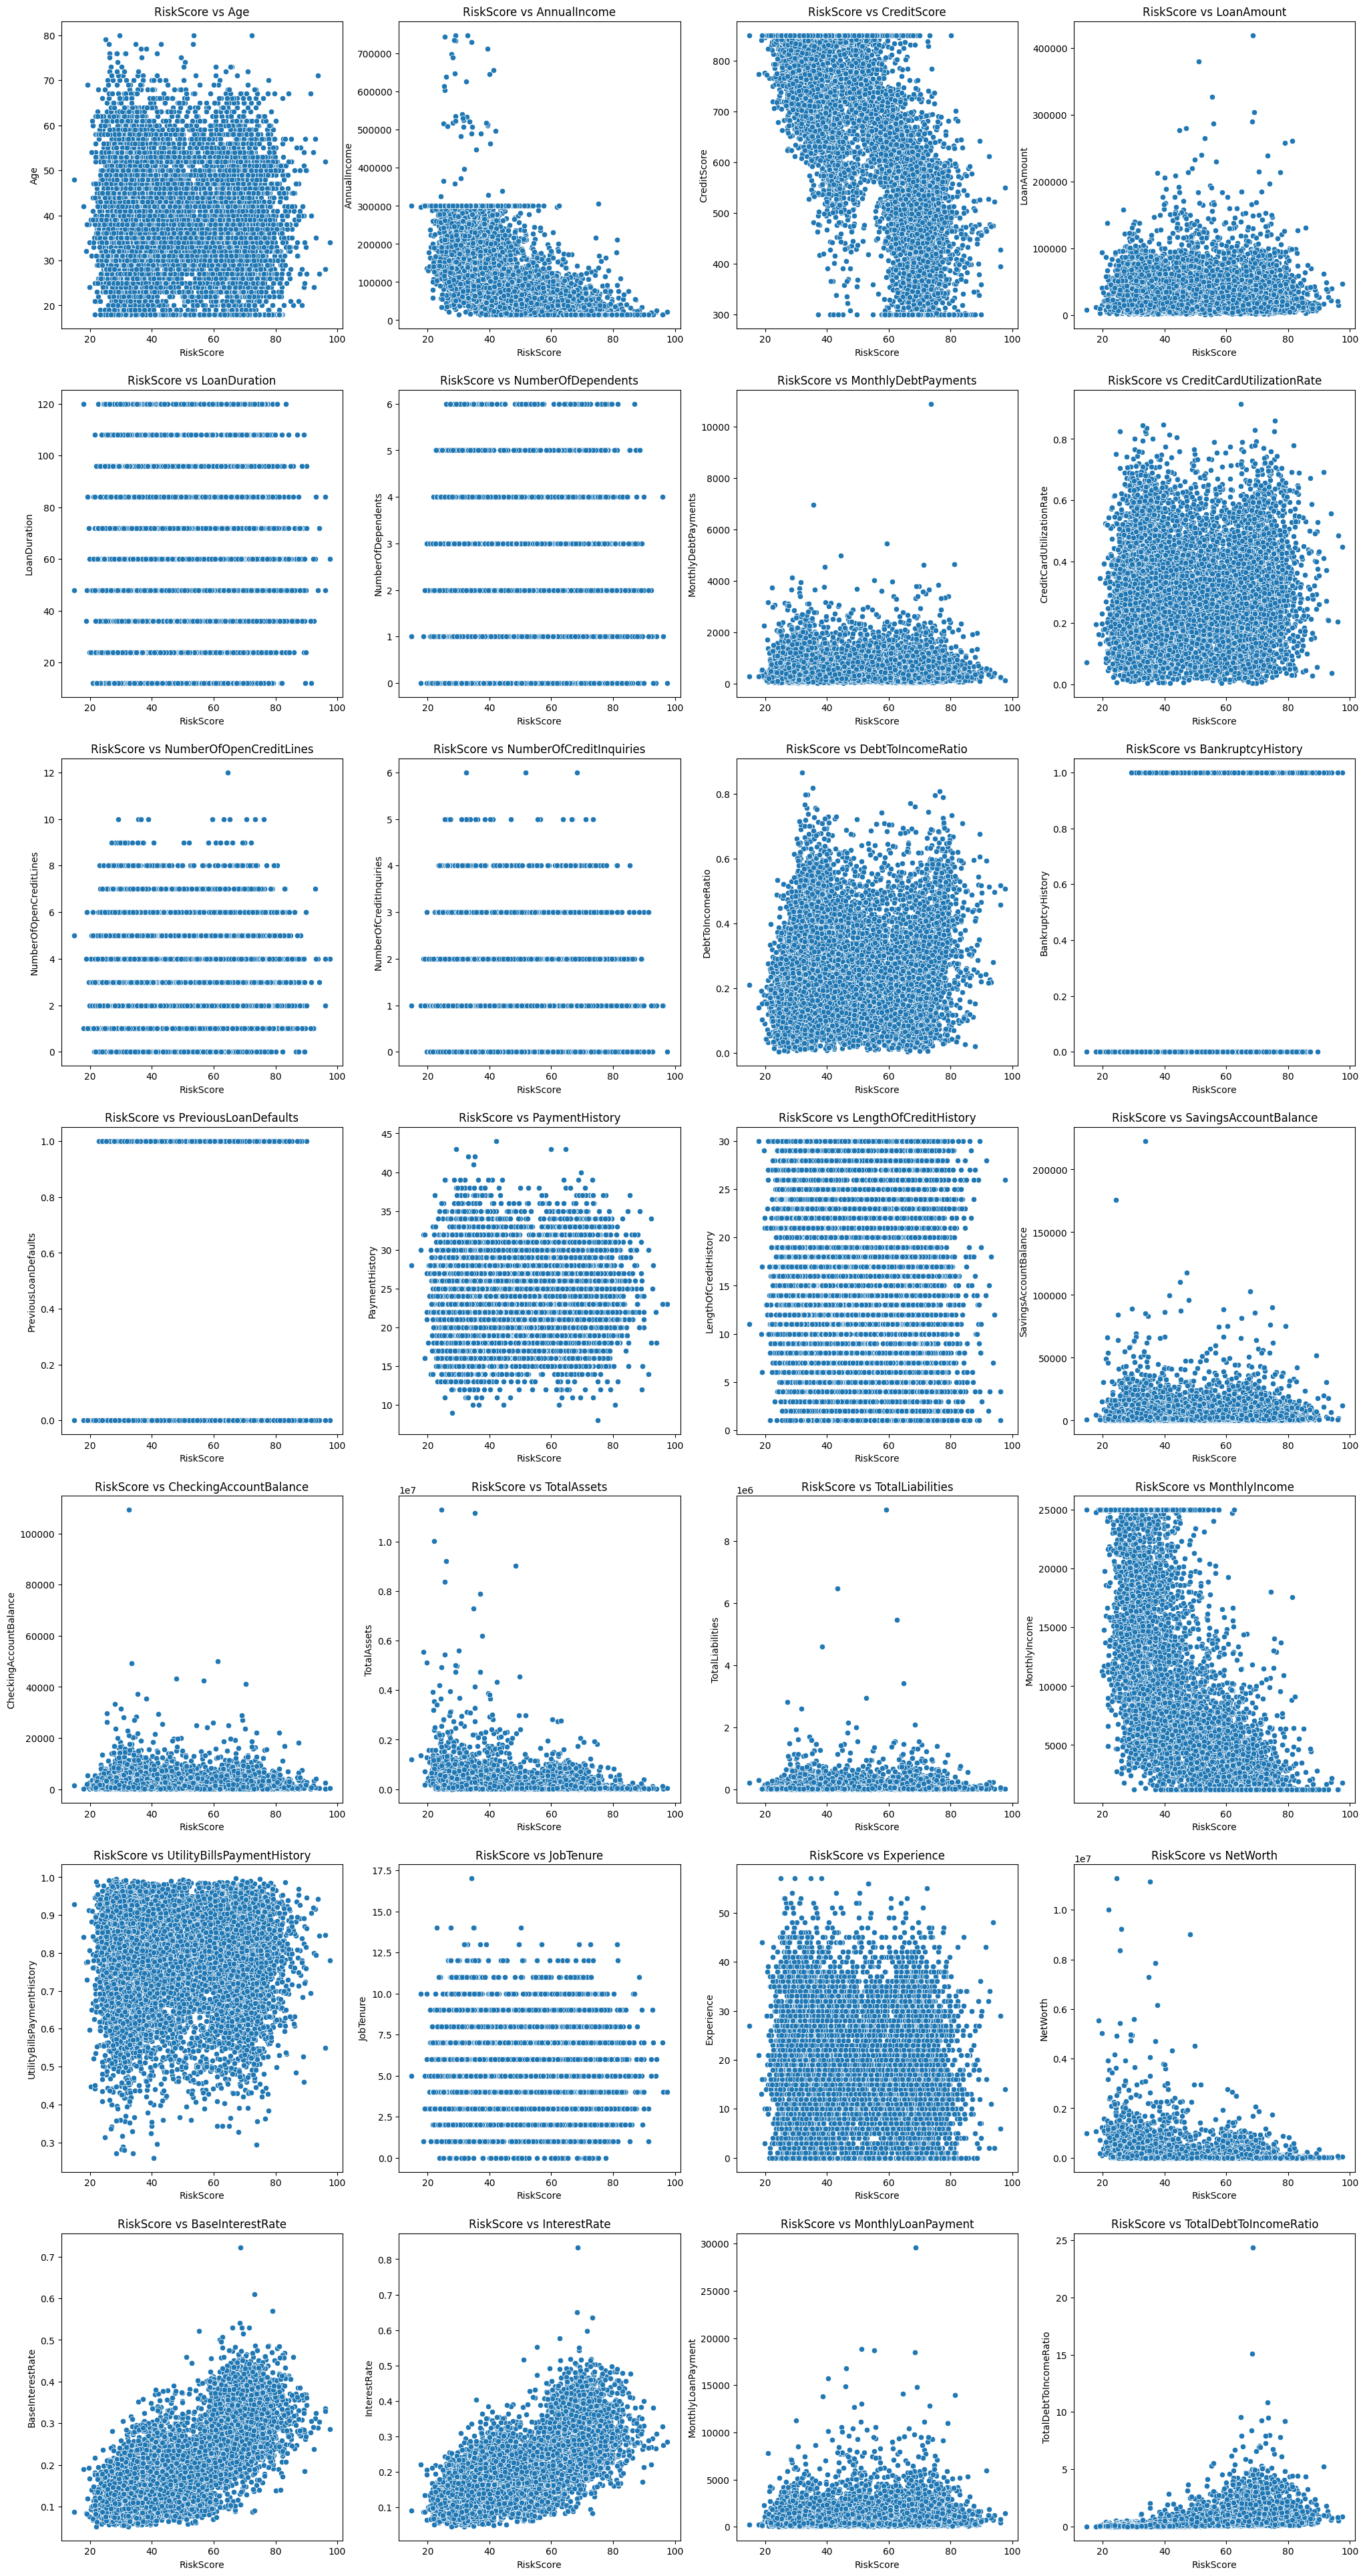

In [9]:


columns_with_number = data.select_dtypes(include=['number']).columns.to_list()
columns_with_number.remove('RiskScore')
number_column_gr = 4
number_rows_gr = math.ceil(len(columns_with_number) / number_column_gr)
fig, axes = plt.subplots(number_rows_gr, number_column_gr, figsize=(25, 7 * number_rows_gr))
axes = axes.flatten()
for i, column in enumerate(columns_with_number):
    sns.scatterplot(data=data, x='RiskScore', y=column, ax=axes[i])
    axes[i].set_title(f'RiskScore vs {column}')

plt.show()
    


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'AnnualIncome'}>,
        <Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'LoanDuration'}>],
       [<Axes: title={'center': 'NumberOfDependents'}>,
        <Axes: title={'center': 'MonthlyDebtPayments'}>,
        <Axes: title={'center': 'CreditCardUtilizationRate'}>,
        <Axes: title={'center': 'NumberOfOpenCreditLines'}>,
        <Axes: title={'center': 'NumberOfCreditInquiries'}>],
       [<Axes: title={'center': 'DebtToIncomeRatio'}>,
        <Axes: title={'center': 'BankruptcyHistory'}>,
        <Axes: title={'center': 'PreviousLoanDefaults'}>,
        <Axes: title={'center': 'PaymentHistory'}>,
        <Axes: title={'center': 'LengthOfCreditHistory'}>],
       [<Axes: title={'center': 'SavingsAccountBalance'}>,
        <Axes: title={'center': 'CheckingAccountBalance'}>,
        <Axes: title={'center': 'TotalAssets'}>,
        <Axes:

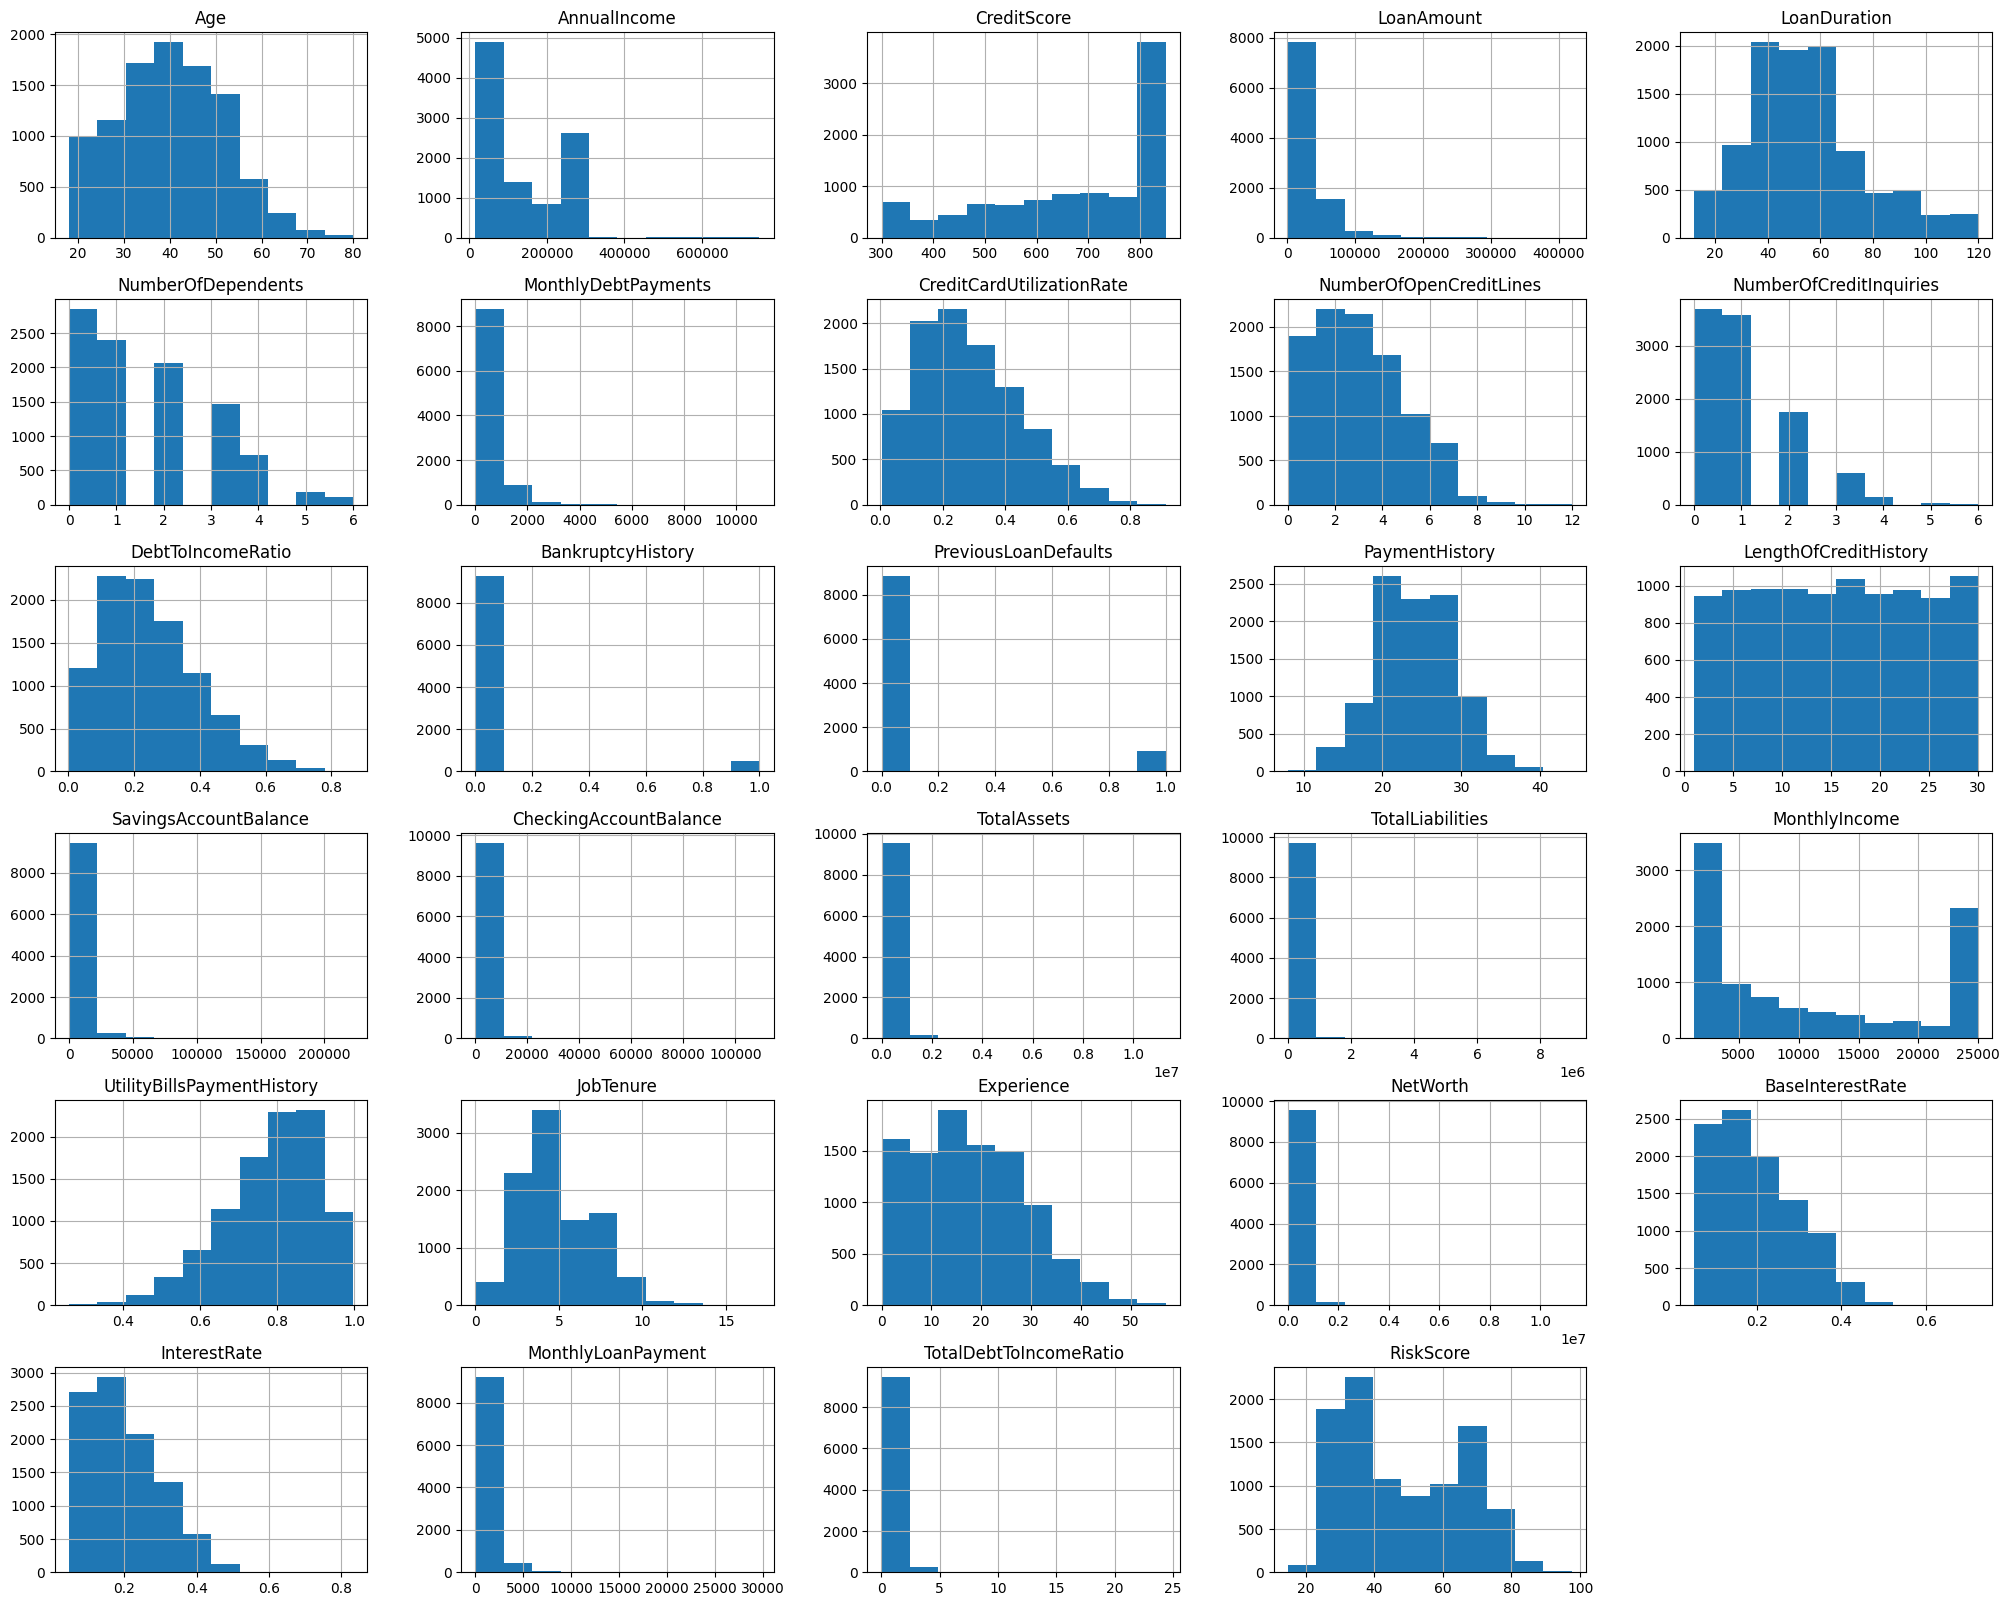

In [10]:
data.hist(bins=10, figsize=(25, 20))

<Axes: >

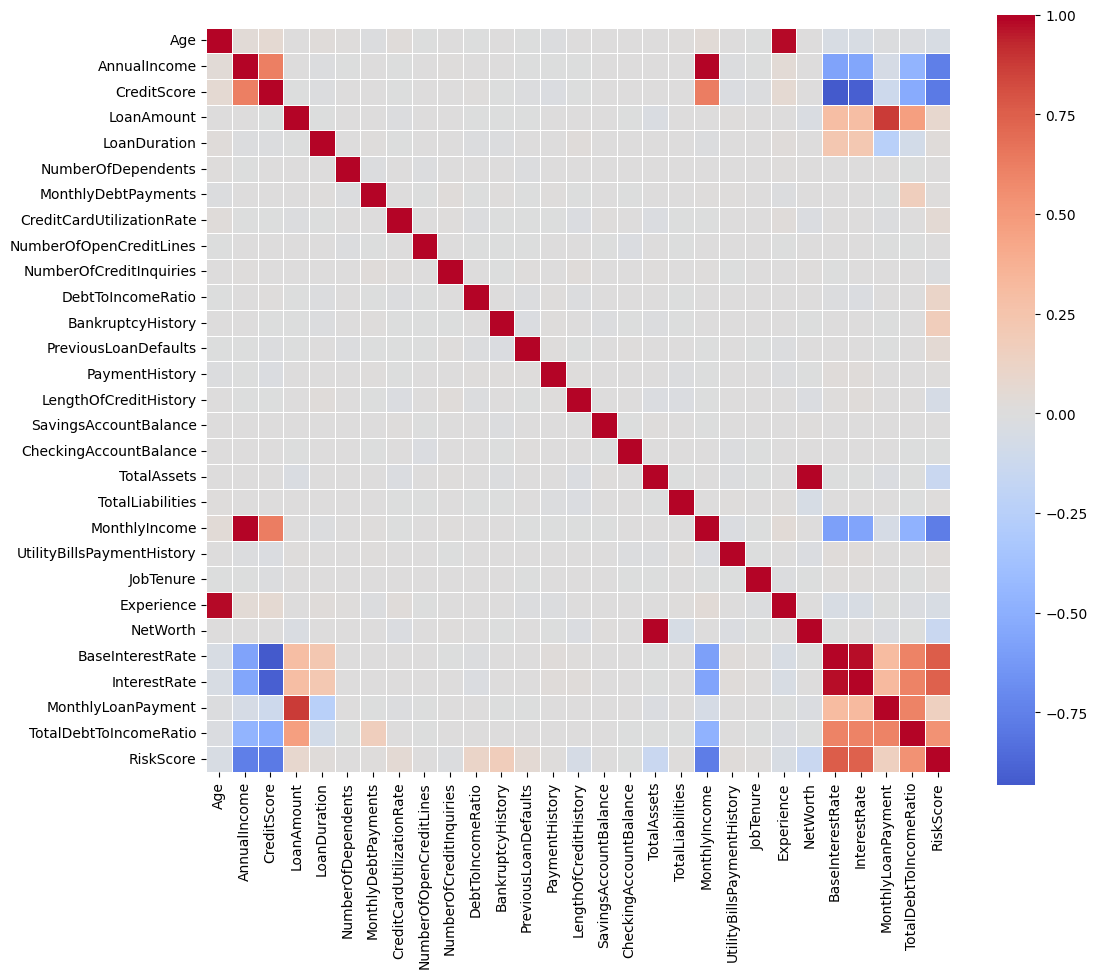

In [11]:
plt.figure(figsize=(12, 10))
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, center=0, cmap='coolwarm', square=True, linewidths=.5)

In [12]:
class MinMaxNormalizer:
    def __init__(self):
        self.params = []
        
    def fit(self, data):
        for i in range(data.shape[1]):
            min_e = np.nanmin(data[:, i])
            max_e = np.nanmax(data[:, i])
            self.params.append((min_e, max_e))

    def transform(self, data):
        new_data = data.copy()
        for i, (min_e, max_e) in enumerate(self.params):
            new_data[:, i] = (new_data[:, i] - min_e) / (max_e - min_e)

        return new_data

class ZScoreNormalizer:
    def __init__(self):
        self.params = []

    def fit(self, data):
        for i in range(data.shape[1]):
            mean = np.nanmean(data[:, i])
            std = np.nanstd(data[:, i])
            self.params.append((mean, std))

    def transform(self, data):
        new_data = data.copy()
        for i, (mean, std) in enumerate(self.params):
            new_data[:, i] = (new_data[:, i] - mean) / std
        return new_data



In [13]:
numerical_features = list(data.select_dtypes(['number']).columns)
numerical_features.remove('RiskScore')
strings_features = list(data.select_dtypes(['object']).columns) 
strings_features.remove('ApplicationDate')


In [14]:
from sklearn.preprocessing import PolynomialFeatures

def n_log1p(x, n):
    y = x.copy()
    for i in range(n):
        y = np.log1p(y)
    return y

def select_features_by_correlation(X, y, threshold=0.1):
    correlations = X.corrwith(y).abs().sort_values(ascending=False)
    selected_features = correlations[correlations > threshold].index.to_list()
    selected_features.remove(y.name)
    return X[selected_features], selected_features


def transform(data, features_for_pol):
    data1 = data.copy()
    data1 = data1.drop([
        'MonthlyIncome',
        'NetWorth',
        'BaseInterestRate', 
        'InterestRate',
        'Experience', 
        'ApplicationDate',
        ], 
    axis=1)
    

    

    data1['Age1'] = data['Age'] < 25
    data1['Age2'] = (data['Age'] < 50) & (data['Age'] >= 25)
    data1['Age3'] = (data['Age'] < 75) & (data['Age'] >= 50)
    data1['Age4'] = data['Age'] >= 75
    data1['CreditScore1'] = data['CreditScore'] > 650
    data1['AnnualIncome1'] = data['AnnualIncome'] > 80_000
    data1['TotalAssets1'] = data['TotalAssets'] > 0.3 * 1e7
    data1['TotalDebtToIncomeRatio1'] = data['TotalDebtToIncomeRatio'] >= 0.3
    data1['UtilityBillsPaymentHistory1'] = data['UtilityBillsPaymentHistory'] <= 0.4
    data1['JobTenure1'] = data['JobTenure'] >= 14
    data1['InterestRate1'] = data['InterestRate'] <= 0.2
    data1['NumberOfCreditInquiries1'] = data['NumberOfCreditInquiries'] >= 5
    data1['TotalLiabilities1'] = data['TotalLiabilities'] >= 1.0 * 1e6
    data1['MonthlyIncome1'] = data['MonthlyIncome'] >= 12_000

    for i in range(2, 3):
        data1[f'UtilityBillsPaymentHistoryPow1/{i}'] = data['UtilityBillsPaymentHistory'] ** (1/i)
        data1[f'MonthlyIncomePow1/{i}'] = data['MonthlyIncome'] ** (1/i)
        data1[f'CreditScorePow1/{i}'] = data['CreditScore']  ** (1/i)
        data1[f'TotalAssetsPow1/{i}'] = data['TotalAssets'] ** (1/i)
        data1[f'TotalLiabilitiesPow1/{i}'] = data['TotalLiabilities']  ** (1/i)
            

    for i in range(1, 2):
        data1[f'MonthlyIncomeLog{i}'] = np.log1p(data['MonthlyIncome'])
        data1[f'TotalAssetsLog{i}'] = np.log1p(data['TotalAssets'])
        data1[f'LoanAmountLog{i}'] = np.log1p(data['LoanAmount'])
        data1[f'UtilityBillsPaymentHistoryLog{i}'] = np.log1p(data['UtilityBillsPaymentHistory'])
        data1[f'InterestRateLog{i}'] = np.log1p(data['InterestRate'])
        data1[f'DebtToIncomeRatioLog{i}'] = np.log1p(data['DebtToIncomeRatio'])


    data1['MonthlyIncomePerPerson'] = data['MonthlyIncome'] / (data['NumberOfDependents'] + 1)
    data1['TotalAssetsToMonthlyIncome'] = data['TotalAssets'] / (data['MonthlyIncome'] + 1e-6)
    data1['MonthlyIncomeToLoanRatio'] = data['MonthlyIncome'] / (data['LoanAmount'] + 1e-6)
    data1['CreditLinesPerInquiry'] = data['NumberOfOpenCreditLines'] / (data['NumberOfCreditInquiries'] + 1e-6)
    data1['NetWorthToMonthlyIncome'] = data['NetWorth'] / (data['MonthlyIncome'] + 1e-6)
    data1['SavingBalanceToCheckingBalance'] = data['SavingsAccountBalance'] / (data['CheckingAccountBalance'] + 1e-6)

    data1['RiskFlag'] = ((data['BankruptcyHistory'] > 0) | (data['PreviousLoanDefaults'] > 0)).astype(int)
    data1['StabilityScore'] = data['PaymentHistory'] * np.log1p(data['LengthOfCreditHistory'])
    data1['FinancialSafetyNet'] = (data['SavingsAccountBalance'] + data['TotalAssets']) / (data['MonthlyDebtPayments'] + 1e-6)

    


    
    if 'RiskScore' in data.columns:
        correlations = data1.corrwith(data['RiskScore'], numeric_only=True).abs().sort_values(ascending=False)
        features_for_pol = correlations.index.to_list()
        features_for_pol.remove('RiskScore')
    

    poly1 = PolynomialFeatures(degree=2, include_bias=False)
    poly_features1 = poly1.fit_transform(data1[features_for_pol[:35]])
    poly_columns1 = poly1.get_feature_names_out()
    poly_df1 = pd.DataFrame(poly_features1, columns=poly_columns1, index=data.index)

    data1 = pd.concat([data1, poly_df1], axis=1)


    poly2 = PolynomialFeatures(degree=3, include_bias=False)
    poly_features2 = poly2.fit_transform(data1[features_for_pol[:10]])
    poly_columns2 = poly2.get_feature_names_out()
    poly_df2 = pd.DataFrame(poly_features2, columns=poly_columns2, index=data.index)

    data1 = pd.concat([data1, poly_df2], axis=1)

    data1 = data1.loc[:, ~data1.columns.duplicated()]
    return data1, features_for_pol

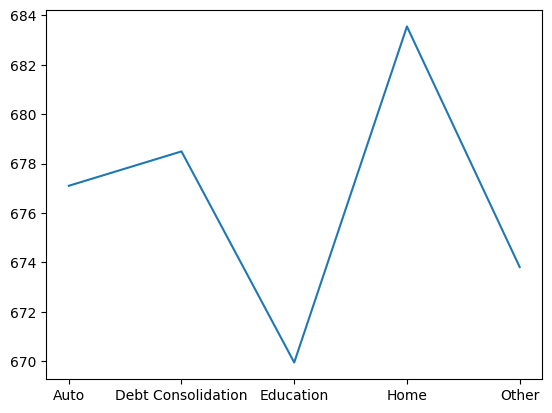

In [15]:
d = data.groupby('LoanPurpose')['CreditScore'].agg('mean')
plt.plot(d.index, d)

In [16]:
def k_fold(X, n: int = 2):
    l = len(X) // n
    rem = len(X) % n
    res = []

    size = len(X)
    index = 0
    indices = list(range(len(X)))
    for i in range(n):
        block_size = l
        if i < rem:
            block_size += 1
        t1 = indices[index:index + block_size]
        t0 = [k for k in range(len(X)) if k not in t1]
        res.append([np.array(t0), np.array(t1)])
        index += block_size
    return res


def leave_one_out(X):
    return k_fold(X, len(X))


In [17]:
def MSE(Y, pred_Y):
    return np.mean((Y - pred_Y) ** 2)


def MAE(Y, pred_Y):
    return np.mean(np.abs(Y - pred_Y))


def R2(Y, pred_Y):
    num = np.sum((Y - pred_Y) ** 2)

    denum = np.sum((Y - np.mean(Y)) ** 2)
    return 1 - num / denum


def MAPE(Y, pred_Y):
    return np.mean(np.abs((Y - pred_Y) / Y))
    

In [18]:
from enum import Enum
import random


class Ridge:
    def __init__(self, alpha=0.01):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = 0

    def fit(self, X, Y):
        tX = X.copy() 
        tX = np.c_[np.ones(X.shape[0]), tX]

        I = np.eye(tX.shape[1])
        I[0, 0] = 0

        W = np.linalg.inv(tX.T @ tX + self.alpha * I) @ tX.T @ Y
        self.coef_ = W[1:]
        self.intercept_ = W[0]

    def predict(self, X):
        return X @ self.coef_ + self.intercept_



class Lr:
    def __init__(self, alpha=0.1, r = 1, learning_rate = 0.1, max_steps=100_000, verbose=False, eps=1e-6):
        self.alpha = alpha
        self.r = r
        self.intercept_ = 0
        self.coef_ = []
        self.learning_rate = learning_rate
        self.max_steps = max_steps
        self.loss_history = []
        self.verbose = verbose
        self.eps = eps

    def fit(self, X, Y):
        self.__gradient_descent(X, Y)
            
    def predict(self, X):
        return X @ self.coef_ + self.intercept_

    def compute_loss(self, X, Y):
        pred = self.predict(X)
        mse = np.mean((Y - pred) ** 2)
        return mse
        
    def __gradient_descent(self, X, Y):
        self.coef_ = np.zeros(X.shape[1])
        self.intercept_ = 0
        k = 1
        while True:
            k += 1
            pred_y = self.predict(X)
            error = pred_y - Y

            
            dw = (2 / len(Y)) * X.T @ error
            db = 2 / len(Y) * np.sum(error)

            if self.r == 2:
                dw += 2 * self.alpha * self.coef_
            elif self.r == 1:
                dw += self.alpha * np.sign(self.coef_)
            else:
                c = np.abs(self.coef_)
                dw[c > 0] += self.alpha * self.r * (np.abs(self.coef_)[c>0] ** (self.r - 1)) * np.sign(np.abs(self.coef_)[c>0])
            
            self.coef_ = self.coef_ - self.learning_rate * dw
            self.intercept_ = self.intercept_ - self.learning_rate * db

            if k % 1000 == 0 and self.verbose:
                loss = self.compute_loss(X, Y)
                self.loss_history.append(loss)
                if k % 10_000 == 0:
                    print(k, np.linalg.norm(dw), 'mse: ', loss)

            if np.linalg.norm(dw) < self.eps or k == self.max_steps:
                break
                
    def loss_plot(self):
        plt.plot(self.loss_history)
        plt.title("loss history")
        plt.xlabel("x1000 steps")
        plt.grid()
        plt.show()


class ElasticNet:
    def __init__(self, alpha=0.1, betta=0.1, learning_rate = 0.1, max_steps=100_000, verbose=False, eps=1e-6):
        self.alpha = alpha
        self.betta = betta
        self.intercept_ = 0
        self.coef_ = []
        self.learning_rate = learning_rate
        self.max_steps = max_steps
        self.loss_history = []
        self.verbose = verbose
        self.eps = eps

    def fit(self, X, Y):
        self.__gradient_descent(X, Y)
            
    def predict(self, X):
        return X @ self.coef_ + self.intercept_

    def compute_loss(self, X, Y):
        pred = self.predict(X)
        mse = np.mean((Y - pred) ** 2)
        return mse
        
    def __gradient_descent(self, X, Y):
        self.coef_ = np.random.rand(X.shape[1])
        self.intercept_ = 0
        k = 1
        while True:
            k += 1
            pred_y = self.predict(X)
            error = pred_y - Y

            
            dw = (2 / len(Y)) * X.T @ error
            db = 2 / len(Y) * np.sum(error)

            dw += self.alpha * self.betta *  np.sign(self.coef_) + 0.5 * self.alpha * (1 - self.betta) * 2 * self.coef_

            self.coef_ = self.coef_ - self.learning_rate * dw
            self.intercept_ = self.intercept_ - self.learning_rate * db

            if k % 1000 == 0 and self.verbose:
                loss = self.compute_loss(X, Y)
                self.loss_history.append(loss)
                if k % 10_000 == 0:
                    print(k, np.linalg.norm(dw), 'mse: ', loss)

            if np.linalg.norm(dw) < self.eps or k == self.max_steps:
                break
                
    def loss_plot(self):
        plt.plot(self.loss_history)
        plt.title("loss history")
        plt.xlabel("x1000 steps")
        plt.grid()
        plt.show()


class LinearRegressionTest:
    class Type(Enum):
        ANALYTIC = 1
        GRADIENTDESCENT = 2
        STOCHASTICGRADIENTDESCENT = 3

        
    def __init__(self, typeLR: Type, learning_rate = 0.1, max_steps=10000, verbose=False, eps=1e-6):
        self.typeLR = typeLR
        self.coef_ = []
        self.intercept_ = 0
        self.learning_rate = learning_rate
        self.max_steps = max_steps
        self.verbose = verbose
        self.eps = eps
        
    def __analytic(self, X, Y):
        tX = X.copy() 
        tX = np.c_[np.ones(X.shape[0]), tX]
        W = np.linalg.inv(tX.T @ tX) @ tX.T @ Y
        self.coef_ = W[1:]
        self.intercept_ = W[0]

    def __gradient_descent(self, X, Y):
        self.coef_ = np.zeros(X.shape[1])
        self.intercept_ = 0
        k = 1
        while True:
            k += 1
            pred_y = self.predict(X)
            error = pred_y - Y
            
            dw = (2 / len(Y)) * X.T @ error
            db = 2 / len(Y) * np.sum(error)

            
            self.coef_ = self.coef_ - self.learning_rate * dw
            self.intercept_ = self.intercept_ - self.learning_rate * db

            if k % 10_000 == 0 and self.verbose:
                loss = self.compute_loss(X, Y)
                print(k, np.linalg.norm(dw), 'mse: ', loss)

            if np.linalg.norm(dw) < self.eps or k == self.max_steps:
                break

    def __stochastic_gradient_descent(self, X, Y):
        self.coef_ = np.zeros(X.shape[1])
        self.intercept_ = 0
        k = 1
        while True:
            i = random.randint(0, X.shape[0]-1)
            pred_y = X[i] @ self.coef_ + self.intercept_
            error = pred_y - Y[i]
            k += 1
            
            dw = 2 * X[i] * error
            db = 2 * error

            if k % 100000 == 0 and self.verbose:
                loss = self.compute_loss(X, Y)
                print(k, np.linalg.norm(dw), 'mse: ', loss)
            
            self.coef_ = self.coef_ - self.learning_rate * dw
            self.intercept_ = self.intercept_ - self.learning_rate * db

            if np.linalg.norm(dw) < self.eps or k == self.max_steps:
                break

    def compute_loss(self, X, Y):
        pred = self.predict(X)
        mse = np.mean((Y - pred) ** 2)
        return mse


    def fit(self, X, Y):
        if self.typeLR == LinearRegressionTest.Type.ANALYTIC:
            self.__analytic(X, Y)
        elif self.typeLR == LinearRegressionTest.Type.GRADIENTDESCENT:
            self.__gradient_descent(X, Y)

        elif self.typeLR == LinearRegressionTest.Type.STOCHASTICGRADIENTDESCENT:
            self.__stochastic_gradient_descent(X, Y)
            
    def predict(self, X):

        return X @ self.coef_ + self.intercept_
        


In [19]:

y = data['RiskScore']

data, features_for_pol = transform(data, [])

data = encode(data)
data = data.astype(np.float64)

data, selected_features = select_features_by_correlation(data, data['RiskScore'], 0.0001)



numpy_X = data.to_numpy()
numpy_Y = y.to_numpy()
normalizer = MinMaxNormalizer()
normalizer = ZScoreNormalizer()
normalizer.fit(numpy_X)
numpy_X = normalizer.transform(numpy_X)

c:\projects\ML\lab1\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\projects\ML\lab1\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [20]:
from sklearn.linear_model import LinearRegression

print("Признаков:", len(data.columns))

t = k_fold(numpy_X, 5)
for i, (train, test)  in enumerate(t):
    my_model1 = Ridge(180)
    my_model1.fit(numpy_X[train], numpy_Y[train])
    pred_Y = []
    for i in numpy_X[test]:
        pred_Y.append(my_model1.predict(i))
        
    print(MSE(numpy_Y[test], pred_Y))


my_model1 = Ridge(180)
my_model1.fit(numpy_X, numpy_Y)
print(my_model1.coef_, "\n==================\n")

model = LinearRegression()
model.fit(numpy_X, numpy_Y)
print(model.coef_)

Признаков: 1046
24.615034900359678
24.04924355603182
24.269129504284173
22.814298926779653
24.18891623409242
[-0.33133221 -0.33133221 -0.41144581 ...  0.05157314  0.07258578
 -0.08930353] 

[ 3.12551168e+05  3.12557144e+05 -4.93896009e+05 ...  2.05682411e+00
  3.50057720e-02 -8.94737011e-02]


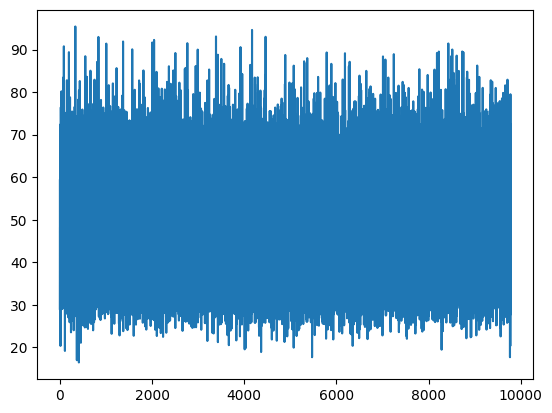

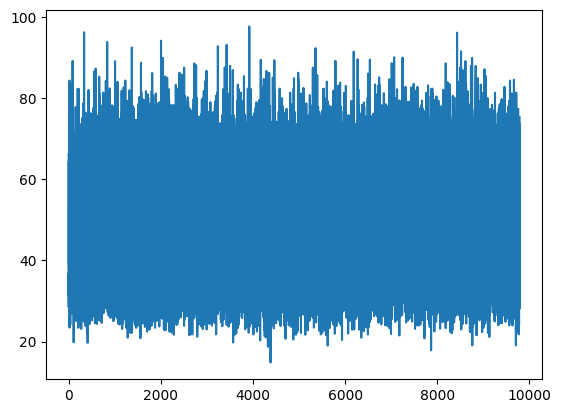

Метрики на обучающей выборке моя реализация/sklearn
MSE:
21.888099746710843
21.888099746710843
MAE:
3.4629261737762307
3.4629261737762307
R2:
0.9264855527871357
0.9264855527871357
MAPE:
0.0802294625589997
0.0802294625589997


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

pred_Y = []
for i in range(len(numpy_X)):
    pred_Y.append(my_model1.predict(numpy_X[i]))


plt.plot(pred_Y)
plt.show()
plt.plot(numpy_Y)
plt.show()

print('Метрики на обучающей выборке: моя реализация/sklearn')
print('MSE:')
print(MSE(numpy_Y, pred_Y))    
print(mean_squared_error(numpy_Y, pred_Y))


print('MAE:')
print(MAE(numpy_Y, pred_Y))    
print(mean_absolute_error(numpy_Y, pred_Y))

print('R2:')
print(R2(numpy_Y, pred_Y))    
print(r2_score(numpy_Y, pred_Y))

print('MAPE:')
print(MAPE(numpy_Y, pred_Y))    
print(mean_absolute_percentage_error(numpy_Y, pred_Y))

(9787, 1046) (5000, 1046)


<Axes: xlabel='RiskScore', ylabel='Count'>

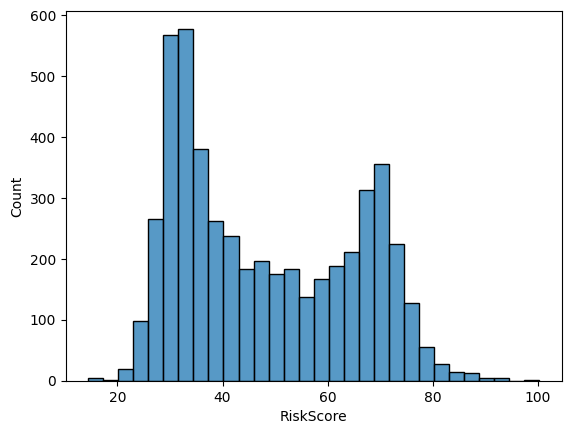

In [22]:
test_data = pd.read_csv('test.csv')

test_data = test_data.drop('ID', axis=1)

test_data, _ = transform(test_data, features_for_pol)
test_data = encode(test_data)
test_data = test_data[selected_features]

test_X = test_data.to_numpy()

print(data.shape, test_data.shape)
test_X = normalizer.transform(test_X)

test_pred_Y = []
test_res = {"ID": [], "RiskScore": []}
for i in range(len(test_X)):
    t = my_model1.predict(test_X[i])
    test_pred_Y.append(t)
    test_res["ID"].append(i)
    test_res["RiskScore"].append(t)


test_data = pd.DataFrame(test_res)
test_data.to_csv("submission.csv", index=False)
sns.histplot(test_data['RiskScore'], bins=30)



**Сравнение линейной регрессии**

In [23]:
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')


if 'ApplicationDate' in copy_data.columns:
    copy_data = copy_data.drop('ApplicationDate', axis=1)
    
copy_data = encode(copy_data)
copy_data = copy_data.dropna()
copy_data = copy_data.astype(float)

numpy_Y = copy_data['RiskScore'].values
if 'RiskScore' in copy_data.columns:
    copy_data = copy_data.drop('RiskScore', axis=1)
numpy_X = copy_data.values

model1 = LinearRegression()
model1.fit(numpy_X, numpy_Y)
pred_y1 = model1.predict(numpy_X)
print('sklearn', MSE(numpy_Y, pred_y1))
model2 = LinearRegressionTest(LinearRegressionTest.Type.ANALYTIC)
model2.fit(numpy_X, numpy_Y)
pred_y2 = model1.predict(numpy_X)
print('my LinearRegressionTest analytic', MSE(numpy_Y, pred_y2))
model3 = LinearRegressionTest(LinearRegressionTest.Type.GRADIENTDESCENT)
model3.fit(numpy_X, numpy_Y)
pred_y3 = model1.predict(numpy_X)
print('my LinearRegressionTest gradient descent', MSE(numpy_Y, pred_y3))
model4 = LinearRegressionTest(LinearRegressionTest.Type.STOCHASTICGRADIENTDESCENT)
model4.fit(numpy_X, numpy_Y)
pred_y4 = model1.predict(numpy_X)
print('my LinearRegressionTest stochastic gradient descent', MSE(numpy_Y, pred_y4))

sklearn 1984729056327.7307
my LinearRegressionTest analytic 1984729056327.7307
my LinearRegressionTest gradient descent 1984729056327.7307
my LinearRegressionTest stochastic gradient descent 1984729056327.7307
